In [1]:
import pandas as pd
import pickle
import json
import os
import pyarrow.parquet as pq
import fastparquet as fp
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import folium
from folium import DivIcon

In [5]:
#file business.parquet to business_df
# Ruta al archivo Parquet
parquet_file_path = 'parquet/business.parquet'

# Carga el archivo Parquet en un DataFrame de PyArrow
table = pq.read_table(parquet_file_path)

# Convierte la tabla de PyArrow en un DataFrame de Pandas
biz_df = table.to_pandas()

# Filtrar las filas sin valores NA / NaN en la columna 'categories'
df_categories = biz_df.dropna(subset=['categories'])

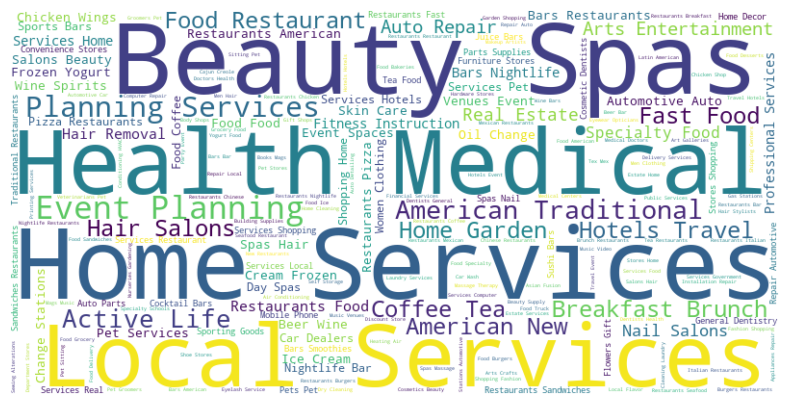

In [7]:
# Wordcloud
# Combinar todas las categorías en un solo texto
text = ' '.join(df_categories['categories'])

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la Word Cloud utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# lista de palabras clave relacionadas con comida
palabras_clave = ["Restaurant", "restaurant", "Food", "food", "Cafe", "cafe", "Diner", "diner", "Bakery", "bakery", "Lunch", "lunch", "Brunch", 'brunch']

# Filtrar los registros que contienen al menos una de las palabras clave en la columna 'category'
business_df = df_categories[df_categories['categories'].str.contains('|'.join(palabras_clave))]

In [14]:
# file tip.parquet to tip_df
# Ruta al archivo Parquet
parquet_file_path = 'parquet/tip.parquet'

# Carga el archivo Parquet en un DataFrame de PyArrow
table = pq.read_table(parquet_file_path)

# Convierte la tabla de PyArrow en un DataFrame de Pandas
tip_df = table.to_pandas()

In [ ]:
# file tip.parquet to tip_df
# Ruta al archivo Parquet
parquet_file_path = 'parquet/tip.parquet'

# Carga el archivo Parquet en un DataFrame de PyArrow
table = pq.read_table(parquet_file_path)

# Convierte la tabla de PyArrow en un DataFrame de Pandas
tip_df = table.to_pandas()

In [18]:
df_yelp = business_df.merge(tip_df, on='business_id', how='left')

In [20]:
# files review.parquet to review_df
# Ruta a la carpeta que contiene los archivos Parquet
carpeta_pq_review = 'pq_review'

# Lista para almacenar los DataFrames individuales de cada archivo Parquet
dataframes_parquet = []

# Recorrer todos los archivos Parquet en la carpeta
for archivo in os.listdir(carpeta_pq_review):
    if archivo.endswith('.parquet'):
        ruta_completa = os.path.join(carpeta_pq_review, archivo)
        
        # Lee cada archivo Parquet y lo convierte en un DataFrame
        tabla = pq.read_table(ruta_completa)
        df = tabla.to_pandas()
        
        # Agrega el DataFrame a la lista
        dataframes_parquet.append(df)

# Combinar todos los DataFrames individuales en uno solo
# review_df = pd.concat(dataframes_parquet, ignore_index=True)

In [ ]:
for df in dataframes_parquet:
    df_yelp = df_yelp.merge(df, on='business_id', how='left')